In [1]:
import librosa
audio_file_path='G:\\enivornment sound-urban\\UrbanSound8K\\audio\\fold10\\2937-1-0-0.wav' #fold10
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[ 6.2847943e-03  1.2413975e-02  1.0996618e-02 ...  6.9263278e-06
 -9.3831368e-06  0.0000000e+00]


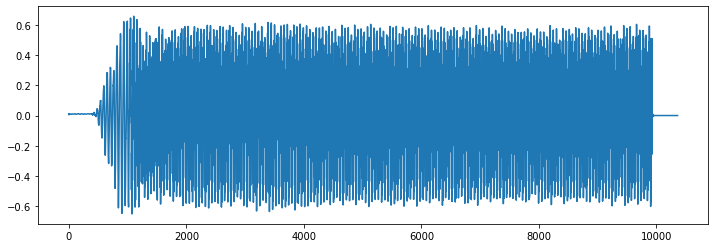

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [5]:
wave_audio

array([[204, 204],
       [406, 406],
       [378, 378],
       ...,
       [ -3,  -3],
       [  1,   1],
       [  2,   2]], dtype=int16)

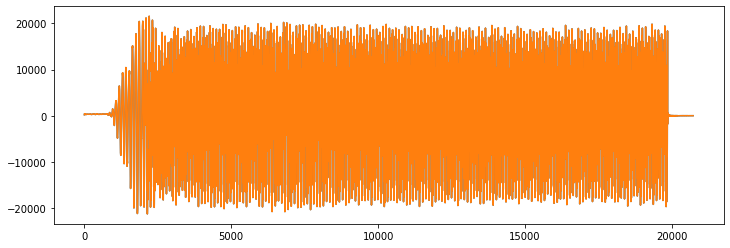

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 21)


In [8]:
mfccs

array([[-3.48967255e+02, -1.60200150e+02, -6.32874260e+01,
        -5.25493851e+01, -6.91495667e+01, -7.35486069e+01,
        -6.82636185e+01, -6.40102997e+01, -7.13589096e+01,
        -7.85781250e+01, -7.38511276e+01, -7.67657928e+01,
        -8.05307922e+01, -8.09656906e+01, -8.20076599e+01,
        -8.37446365e+01, -7.73865433e+01, -7.57403107e+01,
        -6.80439682e+01, -4.25921936e+01, -7.73956909e+01],
       [ 1.30913025e+02,  1.14571915e+02,  9.50331268e+01,
         8.26775665e+01,  7.06999207e+01,  6.88475342e+01,
         6.77031174e+01,  6.66205826e+01,  6.52879791e+01,
         6.42875824e+01,  6.68735886e+01,  6.42056580e+01,
         6.21530914e+01,  6.23777466e+01,  6.26290359e+01,
         6.43814697e+01,  6.72558746e+01,  6.56606445e+01,
         7.11815948e+01,  8.12005768e+01,  8.51140289e+01],
       [ 1.22277594e+01, -2.54829178e+01, -3.26081581e+01,
        -3.31476212e+01, -3.28489685e+01, -2.97150726e+01,
        -2.84359283e+01, -3.11333656e+01, -3.04308014e

In [9]:
import pandas as pd

metadata=pd.read_csv('G:\\enivornment sound-urban\\UrbanSound8K\\metadata\\UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [10]:
metadata['class'].value_counts()

dog_bark            1000
jackhammer          1000
engine_idling       1000
children_playing    1000
drilling            1000
street_music        1000
air_conditioner     1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [11]:
metadata['class']

0               dog_bark
1       children_playing
2       children_playing
3       children_playing
4       children_playing
              ...       
8727            car_horn
8728            car_horn
8729            car_horn
8730            car_horn
8731            car_horn
Name: class, Length: 8732, dtype: object

In [12]:
import pickle

In [13]:
X_val = "G:\\enivornment sound-urban\\UrbanSound8K\\X_val_5000_samples.pkl"
with open(X_val,'rb') as f:
      X_read= pickle.load(f)

In [14]:
y_val = "G:\\enivornment sound-urban\\UrbanSound8K\\y_val_5000_samples.pkl"
with open(y_val,'rb') as f:
      y_read= pickle.load(f)

In [15]:
X_read

array([[-2.15793015e+02,  7.16661224e+01, -1.31813766e+02, ...,
        -1.68275905e+00, -8.85858595e-01,  3.54388773e-01],
       [-4.24686768e+02,  1.10562271e+02, -5.41482353e+01, ...,
         6.17408693e-01, -6.84974134e-01,  5.71514487e-01],
       [-4.59564667e+02,  1.22800354e+02, -4.79247093e+01, ...,
         2.22541404e+00,  1.54661798e+00, -8.36315811e-01],
       ...,
       [-3.37218719e+02,  9.30894470e+01, -1.44049120e+01, ...,
        -3.19794726e+00, -1.30421892e-01, -3.66350794e+00],
       [-3.34881653e+02,  9.12657013e+01, -1.38659401e+01, ...,
        -4.24106359e+00, -7.90868774e-02, -3.13491273e+00],
       [-3.35922180e+02,  9.24561844e+01, -1.44495478e+01, ...,
        -3.94089127e+00,  4.48703915e-01, -3.26382756e+00]], dtype=float32)

In [16]:
X_read.shape

(5000, 40)

In [17]:
y_read

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'air_conditioner', 'air_conditioner', 'air_conditioner'],
      dtype='<U16')

In [18]:
y_read.shape

(5000,)

In [19]:
X=X_read;y=y_read

In [20]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(4000, 40)

In [23]:
y_train

array([4, 7, 3, ..., 7, 5, 8], dtype=int64)

In [24]:
y_train.shape

(4000,)

# Xgboost approach

In [45]:
import xgboost as xgb
model = xgb.XGBClassifier(n_jobs=2) 

In [46]:
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': 2,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [47]:
model.fit(X_train, y_train)

[12:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
from sklearn import metrics
prediction = model.predict(X_test)
prediction

array([2, 6, 8, 8, 5, 6, 3, 8, 4, 3, 8, 5, 4, 9, 8, 9, 9, 2, 5, 3, 5, 9,
       7, 5, 0, 5, 5, 7, 7, 5, 7, 7, 2, 3, 4, 8, 7, 7, 2, 4, 6, 2, 0, 3,
       3, 0, 5, 4, 4, 8, 2, 5, 8, 5, 9, 7, 7, 8, 9, 8, 5, 8, 6, 0, 0, 8,
       5, 9, 5, 9, 0, 0, 5, 4, 9, 0, 5, 2, 8, 3, 9, 5, 9, 4, 8, 8, 3, 8,
       0, 9, 1, 5, 8, 7, 1, 0, 7, 9, 7, 0, 2, 9, 0, 2, 5, 5, 3, 0, 9, 0,
       0, 7, 4, 5, 5, 6, 1, 9, 5, 4, 5, 8, 2, 4, 2, 0, 9, 0, 2, 4, 4, 2,
       4, 2, 7, 5, 1, 2, 7, 7, 5, 7, 2, 0, 0, 0, 6, 4, 0, 3, 8, 0, 7, 2,
       0, 2, 0, 1, 2, 5, 4, 3, 3, 7, 5, 7, 8, 4, 1, 8, 4, 6, 8, 9, 5, 4,
       0, 9, 4, 5, 3, 0, 0, 3, 2, 3, 5, 2, 8, 0, 5, 5, 0, 7, 7, 7, 3, 2,
       7, 7, 0, 3, 8, 7, 4, 5, 4, 2, 9, 4, 3, 3, 9, 8, 0, 3, 3, 0, 5, 5,
       5, 5, 2, 4, 4, 0, 8, 8, 4, 2, 8, 5, 4, 9, 5, 4, 0, 5, 8, 2, 0, 5,
       0, 0, 9, 5, 5, 8, 9, 0, 7, 2, 2, 6, 2, 3, 2, 7, 8, 3, 4, 9, 9, 0,
       6, 5, 8, 6, 0, 5, 3, 3, 9, 9, 5, 9, 6, 8, 5, 6, 5, 2, 5, 2, 2, 0,
       1, 4, 0, 9, 5, 2, 5, 5, 8, 8, 5, 9, 4, 9, 5,

In [50]:
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction))

Accuracy =  0.921


In [52]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model, X,y, cv=5, scoring = 'accuracy')
score

G:\New folder\envs\pyto\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:12:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([0.44 , 0.59 , 0.556, 0.568, 0.507])

In [53]:
score.mean()

0.5322

In [54]:
import lightgbm as lgb

In [55]:
clf = lgb.LGBMClassifier(n_jobs=2)

In [56]:
clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': 2,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [57]:
clf.fit(X_train, y_train)

LGBMClassifier(n_jobs=2)

In [58]:
from sklearn import metrics
prediction2 = clf.predict(X_test)
prediction2

array([2, 6, 8, 8, 5, 2, 3, 8, 4, 9, 8, 5, 4, 9, 8, 9, 9, 2, 5, 3, 5, 9,
       7, 5, 0, 5, 5, 7, 7, 5, 7, 7, 2, 3, 4, 8, 7, 7, 3, 4, 6, 2, 0, 3,
       3, 0, 5, 4, 4, 8, 2, 4, 8, 5, 9, 7, 7, 8, 9, 8, 5, 8, 6, 0, 0, 8,
       5, 9, 5, 9, 0, 0, 5, 4, 9, 0, 5, 2, 8, 3, 9, 5, 9, 4, 2, 3, 3, 8,
       0, 9, 1, 5, 8, 7, 1, 0, 7, 9, 7, 0, 2, 9, 0, 2, 5, 5, 3, 0, 9, 0,
       0, 7, 4, 5, 5, 6, 1, 9, 5, 4, 8, 8, 2, 4, 2, 0, 9, 0, 2, 4, 4, 2,
       4, 2, 0, 5, 1, 2, 7, 7, 5, 7, 2, 0, 0, 0, 6, 4, 0, 3, 8, 0, 7, 2,
       0, 2, 0, 1, 2, 5, 4, 3, 3, 7, 5, 7, 8, 4, 1, 8, 4, 6, 8, 9, 5, 4,
       0, 9, 4, 5, 1, 0, 0, 3, 2, 3, 5, 2, 8, 0, 5, 5, 0, 7, 7, 7, 3, 2,
       7, 7, 0, 3, 8, 9, 4, 5, 4, 2, 9, 4, 3, 3, 9, 8, 0, 3, 3, 0, 5, 5,
       5, 5, 2, 4, 4, 0, 8, 8, 4, 2, 8, 5, 4, 9, 5, 4, 0, 5, 8, 2, 0, 5,
       0, 0, 9, 5, 5, 8, 6, 0, 7, 2, 2, 6, 2, 3, 9, 7, 8, 3, 4, 9, 9, 0,
       6, 5, 8, 6, 0, 5, 3, 3, 9, 9, 5, 0, 6, 8, 5, 6, 5, 9, 5, 2, 2, 0,
       1, 4, 0, 9, 5, 2, 5, 5, 8, 8, 5, 9, 4, 9, 5,

In [59]:
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction2))

Accuracy =  0.935


In [61]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf, X,y, cv=5, scoring = 'accuracy')
score

array([0.45 , 0.584, 0.557, 0.587, 0.519])

In [62]:
score.mean()

0.5394

# Adaboost Classifier

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
model2 = AdaBoostClassifier(n_estimators=100) 

model2.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [27]:
model2.get_params() 

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': None}

In [28]:
from sklearn import metrics
prediction_test = model2.predict(X_test)
prediction_test

array([0, 2, 8, 9, 5, 2, 3, 8, 7, 0, 8, 0, 4, 9, 0, 4, 0, 9, 5, 3, 5, 9,
       7, 2, 0, 8, 0, 7, 7, 5, 4, 7, 2, 8, 6, 8, 7, 0, 7, 1, 8, 2, 5, 3,
       8, 0, 9, 5, 4, 3, 2, 3, 8, 5, 0, 2, 7, 3, 9, 8, 5, 8, 2, 3, 7, 8,
       5, 3, 5, 4, 4, 7, 2, 4, 3, 0, 5, 5, 8, 5, 0, 2, 2, 7, 2, 8, 3, 8,
       0, 9, 1, 9, 2, 7, 1, 0, 7, 9, 7, 7, 2, 1, 0, 2, 9, 8, 3, 0, 9, 2,
       3, 7, 4, 5, 5, 3, 9, 9, 8, 7, 8, 9, 2, 4, 9, 0, 3, 0, 2, 4, 5, 2,
       2, 2, 5, 0, 1, 2, 7, 4, 5, 7, 6, 2, 8, 4, 2, 6, 2, 3, 8, 0, 7, 2,
       4, 2, 2, 5, 2, 0, 1, 8, 8, 7, 0, 7, 8, 4, 1, 8, 6, 6, 8, 3, 9, 8,
       3, 7, 7, 5, 9, 2, 0, 6, 2, 8, 5, 2, 5, 9, 5, 9, 7, 7, 0, 7, 2, 2,
       7, 7, 0, 8, 8, 5, 8, 5, 7, 2, 9, 4, 8, 8, 9, 8, 3, 3, 3, 0, 9, 4,
       5, 5, 2, 8, 4, 0, 8, 8, 4, 2, 8, 9, 7, 9, 8, 6, 4, 5, 9, 8, 3, 5,
       9, 9, 9, 5, 3, 8, 6, 0, 7, 9, 2, 6, 9, 3, 2, 0, 9, 3, 6, 4, 3, 0,
       6, 4, 2, 6, 2, 0, 3, 3, 9, 4, 8, 0, 6, 8, 0, 3, 5, 2, 5, 2, 3, 7,
       0, 8, 0, 9, 2, 9, 5, 2, 8, 8, 5, 4, 4, 0, 5,

In [29]:
predict_train=model2.predict(X_train)
predict_train

array([9, 7, 4, ..., 7, 9, 9], dtype=int64)

In [30]:
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy =  0.48


In [31]:
print ("training Accuracy = ", metrics.accuracy_score(y_train, predict_train))

training Accuracy =  0.49575


In [32]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model2, X,y, cv=5, scoring = 'accuracy')
score

array([0.268, 0.365, 0.328, 0.32 , 0.306])

In [33]:
score.mean()

0.3174